In [27]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [126]:
seattle = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Seattle DF Cleaned.csv")
#seattle = pd.read_csv("../data/Seattle DF Cleaned.csv")
calendar = pd.read_csv("/Users/karinahou/Desktop/Data Science Bootcamp/Calendar Cleaned.csv")

In [84]:
pd.set_option('display.max_columns', 500)
seattle.head()

,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type,id,neighbourhood_group,neighbourhood,minimum_nights,last_review,availability_365
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly,2318,Central Area,Madrona,4,2019-06-18,335
1,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,49,2018-12-20 04:11:25.482975,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly,5682,Delridge,South Delridge,3,2018-11-24,0
2,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,90,2018-12-20 03:12:38.391711,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly,6606,Other neighborhoods,Wallingford,2,2019-06-23,43
3,9419,30559,Private room,"Seattle, WA, United States",130,4.5,2,1.0,65,2018-12-20 04:08:20.099202,47.550167,-122.319366,0101000020E6100000145D177E70945EC0522B4CDF6BC6...,Glorious sun room w/ memory foambed,USD,nightly,9419,Other neighborhoods,Georgetown,2,2019-06-23,356
4,9460,30832,Private room,"Seattle, WA, United States",401,5.0,2,1.0,78,2018-12-20 03:45:03.853262,47.608010,-122.328739,0101000020E6100000DD7A4D0F0A955EC00BD28C45D3CD...,Downtown/Convention Ctr B&B - Nice!,USD,nightly,9460,Downtown,First Hill,3,2019-07-07,87


In [89]:
#remove IDs, lat long columns, address, name, locations, any columns that won't help predict price
seattle_dropped = seattle.drop(["room_id", "host_id", "id", "address", "last_modified", "name", "currency", "rate_type", "last_review", "neighbourhood", "neighbourhood_group", "location"], axis = 1);
seattle_dropped.head()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,minimum_nights,availability_365
0,Entire home/apt,21,5.0,8,4.0,250,47.610819,-122.290816,4,335
1,Entire home/apt,462,5.0,2,0.0,49,47.523980,-122.359891,3,0
2,Entire home/apt,134,4.5,2,1.0,90,47.654109,-122.337605,2,43
3,Private room,130,4.5,2,1.0,65,47.550167,-122.319366,2,356
4,Private room,401,5.0,2,1.0,78,47.608010,-122.328739,3,87


In [90]:
seattle_dropped.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,minimum_nights,availability_365
count,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000,5345.000000
mean,55.987839,4.149579,3.765762,1.376614,111.263798,47.625122,-122.334214,3.705332,152.499719
std,70.842741,1.733652,2.396071,1.026855,90.673691,0.044395,0.031984,12.178953,121.761117
min,0.000000,0.000000,1.000000,0.000000,15.000000,47.508078,-122.419637,1.000000,0.000000
25%,7.000000,4.500000,2.000000,1.000000,65.000000,47.604686,-122.354914,1.000000,38.000000
50%,29.000000,5.000000,3.000000,1.000000,88.000000,47.620188,-122.332168,2.000000,130.000000
75%,79.000000,5.000000,5.000000,2.000000,125.000000,47.659153,-122.311937,3.000000,280.000000
max,687.000000,5.000000,28.000000,8.000000,1650.000000,47.723050,-122.241349,365.000000,365.000000


In [91]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [92]:
m = ols('price ~ bedrooms',seattle_dropped).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     2932.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:16:05   Log-Likelihood:                -30506.
No. Observations:                5345   AIC:                         6.102e+04
Df Residuals:                    5343   BIC:                         6.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.9080      1.667     23.339      0.0

In [111]:
linprice = ols('price ~ bedrooms + overall_satisfaction + availability_365 + minimum_nights',seattle_dropped).fit()
print(linprice.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     759.3
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:23:34   Log-Likelihood:                -30472.
No. Observations:                5345   AIC:                         6.095e+04
Df Residuals:                    5340   BIC:                         6.099e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               43.1901 

In [112]:
# your turn
lm.fit(X, seattle_dropped.bedrooms)

ess = np.sum((lm.predict(X) - np.mean(seattle_dropped.bedrooms)) ** 2)
rss = np.sum((seattle_dropped.bedrooms - lm.predict(X)) ** 2)
tss = rss + ess
r2 = ess/tss

k = 1
mse = rss/(len(seattle_dropped.bedrooms) - k - 1)
msr = ess/k
f_stat = msr/mse

print("R^2 value is: ", r2)
print("F statistic is: ", f_stat)

R^2 value is:  1.0
F statistic is:  2.359878300701448e+32


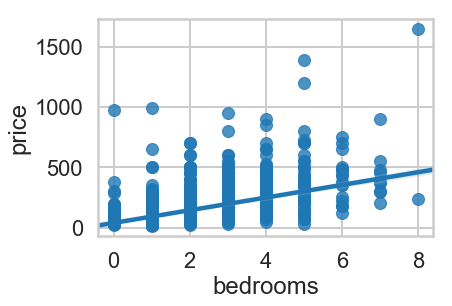

In [93]:
sns.regplot(y="price", x="bedrooms", data=seattle_dropped, fit_reg = True)

Text(0.5, 1.0, 'Predicted Prices vs. Original Prices')

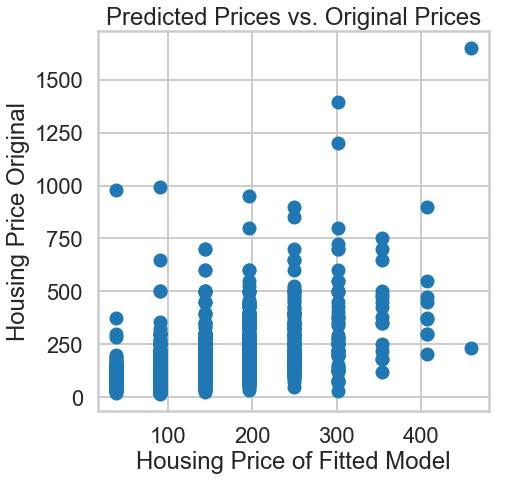

In [94]:
plt.figure(figsize = (7,7))
plt.scatter(m.fittedvalues, seattle_dropped.price)
plt.xlabel("Housing Price of Fitted Model")
plt.ylabel("Housing Price Original")
plt.title("Predicted Prices vs. Original Prices")

In [95]:
from sklearn.linear_model import LinearRegression
X = seattle_dropped.drop('price', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()

In [96]:
print(lm.copy_X, lm.fit, lm.fit_intercept, lm.get_params, lm.n_jobs, lm.normalize, lm.predict, lm.score, lm.set_params)

True <bound method LinearRegression.fit of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)> True <bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)> None False <bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)> <bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)> <bound method BaseEstimator.set_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>


In [97]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(["Entire home/apt", "Private room"])

LabelEncoder()

In [98]:
list(le.classes_)

['Entire home/apt', 'Private room']

In [99]:
le.transform(["Entire home/apt", "Private room"])

array([0, 1])

In [100]:
list(le.inverse_transform([0, 1]))

['Entire home/apt', 'Private room']

In [101]:
roomtype_dummies = pd.get_dummies(seattle_dropped.room_type)
roomtype_dummies.head()

,Entire home/apt,Private room,Shared room
0,1,0,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0


In [102]:
#seattle["Entire home/apt"] = roomtype_dummies["Entire home/apt"]
#seattle["Private room"] = roomtype_dummies["Private room"]
#seattle["Shared Room"] = roomtype_dummies["Shared room"]

#result = pd.concat([df1, df4], axis=1, sort=False)
seattle_dropped = seattle_dropped.drop(["room_type"], axis = 1)
seattle_roomtype = pd.concat([seattle_dropped, roomtype_dummies], axis = 1, sort = False)
seattle_roomtype.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,minimum_nights,availability_365,Entire home/apt,Private room,Shared room
0,21,5.0,8,4.0,250,47.610819,-122.290816,4,335,1,0,0
1,462,5.0,2,0.0,49,47.523980,-122.359891,3,0,1,0,0
2,134,4.5,2,1.0,90,47.654109,-122.337605,2,43,1,0,0
3,130,4.5,2,1.0,65,47.550167,-122.319366,2,356,0,1,0
4,401,5.0,2,1.0,78,47.608010,-122.328739,3,87,0,1,0


In [103]:
X = X.drop("room_type", axis = 1);

In [104]:
lm.fit(X, seattle_roomtype.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -25680.18771108338


In [106]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 8


In [107]:
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,reviews,-0.112618
1,overall_satisfaction,-1.499238
2,accommodates,8.530509
3,bedrooms,34.849375
4,latitude,25.956038
5,longitude,-200.103741
6,minimum_nights,0.075465
7,availability_365,0.051849


In [108]:
lm.predict(X)[0:5]

array([241.90209605,  -4.21974205,  69.39005643,  79.72178428,
        37.95767056])

Text(0.5, 0, 'Predicted prices')

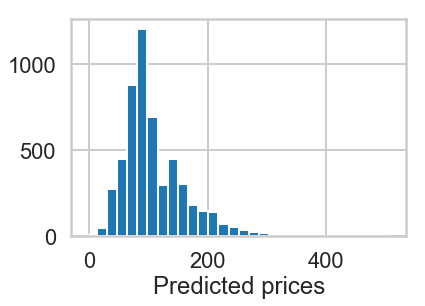

In [109]:
plt.hist(lm.predict(X), bins = 30)
plt.xlabel("Predicted prices")

In [ ]:
#deicsion trees

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [116]:
seattle_roomtype.head()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,minimum_nights,availability_365,Entire home/apt,Private room,Shared room
0,21,5.0,8,4.0,250,47.610819,-122.290816,4,335,1,0,0
1,462,5.0,2,0.0,49,47.523980,-122.359891,3,0,1,0,0
2,134,4.5,2,1.0,90,47.654109,-122.337605,2,43,1,0,0
3,130,4.5,2,1.0,65,47.550167,-122.319366,2,356,0,1,0
4,401,5.0,2,1.0,78,47.608010,-122.328739,3,87,0,1,0


In [128]:
feature_cols = ["reviews", "overall_satisfaction", "accommodates", "bedrooms","latitude", "longitude", 
                "minimum_nights", "availability_365", "Entire home/apt", "Private room", "Shared room"]
X = seattle_roomtype[feature_cols]
y = seattle_dropped.price



In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [130]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [131]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9532418952618454


In [139]:
"""
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
#import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file = dot_data,
               filled = True, rounded = True, special_characters = True, 
                feature_names = feature_cols, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('seattle.png')
Image(graph.create_png)
""";
